In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_breast_cancer()

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) 

In [14]:
from sklearn.svm import SVC

kernels = ['poly','linear','rbf']
models = {}
for kernel in kernels:
    model = SVC(kernel = kernel,random_state = 42)
    model.fit(X_train,y_train)
    models[kernel] = model

In [16]:
for kernel in kernels:
    print(f"{kernel} kernel accuracy:", models[kernel].score(X_test, y_test))

poly kernel accuracy: 0.868421052631579
linear kernel accuracy: 0.9736842105263158
rbf kernel accuracy: 0.9824561403508771


Confusion Matrix for poly:
[[28 15]
 [ 0 71]]


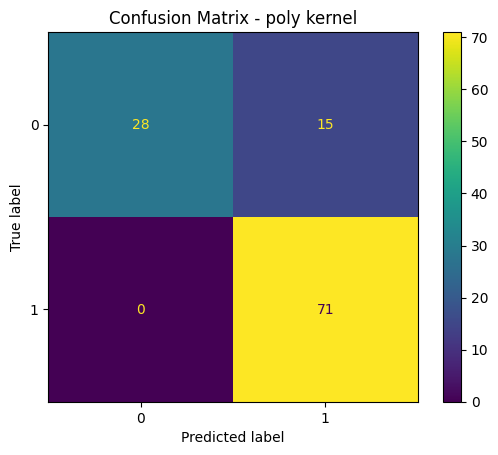

Confusion Matrix for linear:
[[40  3]
 [ 0 71]]


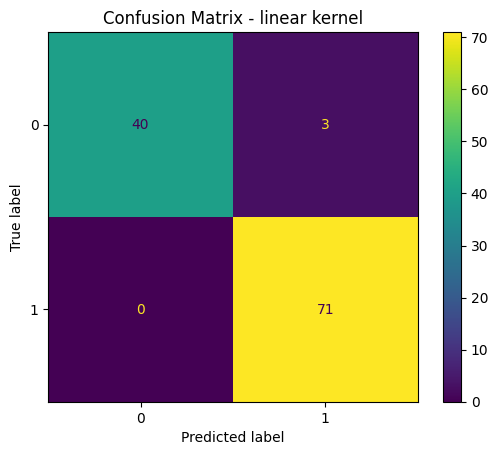

Confusion Matrix for rbf:
[[41  2]
 [ 0 71]]


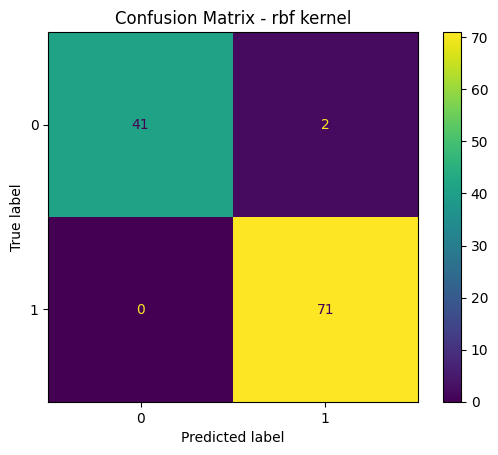

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

for kernel in kernels:
    y_pred = models[kernel].predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    print(f"Confusion Matrix for {kernel}:")
    print(cm)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {kernel} kernel")
    plt.show()

In [22]:
for kernel in kernels:
    y_pred = models[kernel].predict(X_test)
    print(f"classification report for {kernel}")
    print(classification_report(y_test,y_pred))

classification report for poly
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114

classification report for linear
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

classification report for rbf
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98 

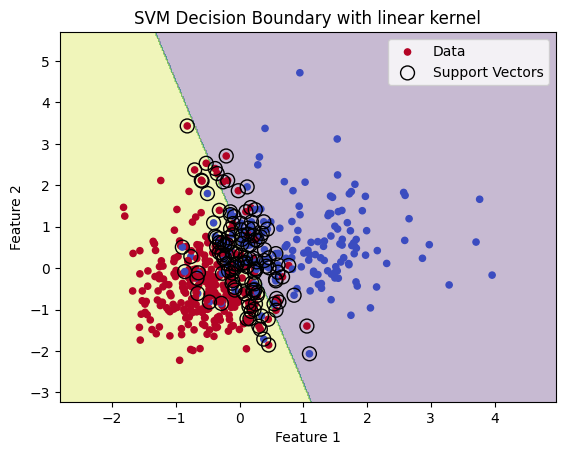

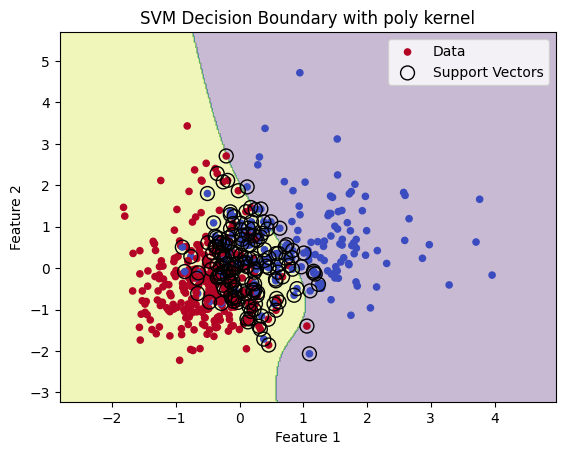

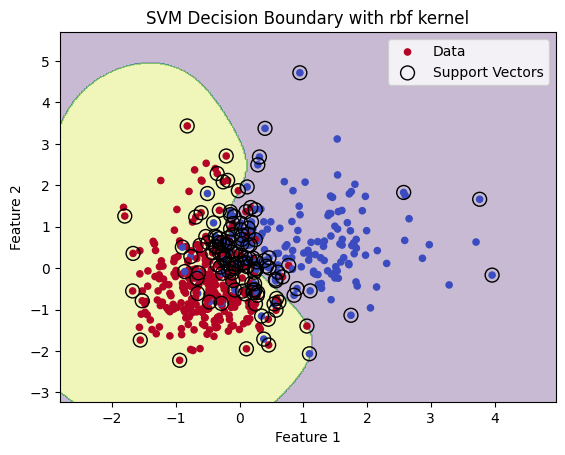

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Use only 2 features for visualization
X_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]

kernels = ['linear', 'poly', 'rbf']

def plot_decision_boundary_with_sv(model, X, y, kernel_name):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.coolwarm, label='Data')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')
    plt.title(f"SVM Decision Boundary with {kernel_name} kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Train and plot for each kernel
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_vis, y_train)  # Use X_vis for the first 2 features
    plot_decision_boundary_with_sv(model, X_vis, y_train, kernel)


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1,1,10],
    'kernel': ['linear','rbf','poly'],
    'gamma':['scale','auto']
}

grid = GridSearchCV(SVC(), param_grid, refit= True, cv =5)
grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [28]:
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)


Best Score: 0.9758241758241759
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Estimator: SVC(C=1)
